In [53]:
from hht_tools import spectrogram
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt
%matplotlib notebook

In [64]:
# create syntehtic singal of two chirps plus one sine wave
dt = 0.01
t = np.arange(0,10,dt)

#single sine wave
ampl = 1
f = 3 #in Hz
y1 = ampl*np.sin(2*np.pi*f*t)
theoretical_f1 = np.ones(len(t))*f  #This is the theoretical frequency content

# linear INCREASING chirp
f0 = 0.1
f1 = 20
t1  = t.max()
ampl = 1
y2 = ampl*chirp(t, f0, t1, f1, method='linear')
theoretical_f2 = f0 + (f1 - f0) * t / t1

# log DECREASING chirp
f0 = 30
f1 = 5
t1  = t.max()
ampl = 1
y3 = ampl*chirp(t, f0, t1, f1, method='logarithmic')
theoretical_f3 = f0 * (f1/f0)**(t/t1)

<IPython.core.display.Javascript object>


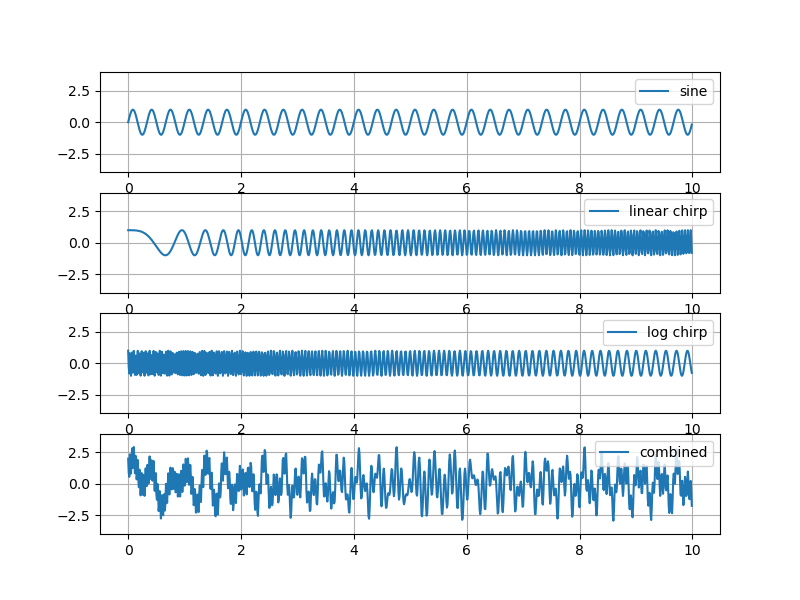

In [65]:
#Combine all and plot
y_total = y1 + y2 +y3

plt.figure(figsize=(8,6))
ylims=[-4,4]

plt.subplot(4,1,1)
plt.plot(t,y1,label='sine')
plt.ylim(ylims)
plt.legend()
plt.grid()

plt.subplot(4,1,2)
plt.plot(t,y2,label='linear chirp')
plt.ylim(ylims)
plt.legend()
plt.grid()

plt.subplot(4,1,3)
plt.plot(t,y3,label='log chirp')
plt.ylim(ylims)
plt.legend()
plt.grid()

plt.subplot(4,1,4)
plt.plot(t,y_total,label='combined')
plt.ylim(ylims)
plt.legend()
plt.grid()

In [81]:
#Caluclate hte HHT spectrogram

#Define the period bins you are interested in
min_period = 2*dt #Nyquist
max_period = 50 
number_of_bins = 100

#lets make logarithmically spaced period bins
period_bins = np.logspace(np.log10(min_period),np.log10(max_period),number_of_bins)

#get the spectrogram
timeSpec,periodSpec,ampSpec = spectrogram(t,y_total,dt,[min_period,max_period],period_bins=period_bins)

<IPython.core.display.Javascript object>


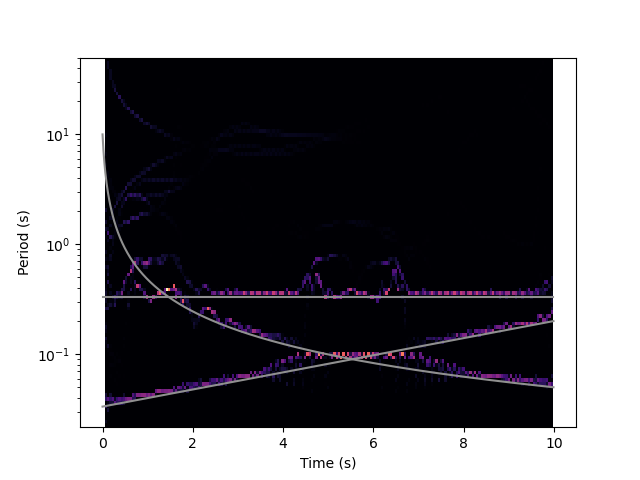

/var/folders/5x/5xtm6r7126g41vdgwb462xp40000gn/T/ipykernel_2420/1434442847.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(timeSpec,periodSpec,ampSpec,cmap='magma')


Text(0, 0.5, 'Period (s)')

In [85]:
#grey lines are what the theoretical spectrogram should be
plt.figure()
plt.gca().set_yscale('log')
plt.pcolormesh(timeSpec,periodSpec,ampSpec,cmap='magma')
c='#909090'
plt.plot(t,1/theoretical_f1,color=c)
plt.plot(t,1/theoretical_f2,color=c)
plt.plot(t,1/theoretical_f3,color=c)
plt.xlabel('Time (s)')
plt.ylabel('Period (s)')